In [4]:
import numpy as np
import pandas as pd


df = pd.read_csv('BrentOilPrices.csv')

# Calculate log returns
df['log_returns'] = np.log(df['Price']).diff()

# Drop NA from diff()
log_returns = df['log_returns'].dropna().values

# Save log_returns as numpy file
np.save('log_returns.npy', log_returns)

print("log_returns.npy created with length:", len(log_returns))

log_returns.npy created with length: 9010


In [5]:
# 2c: Change Point Segment Analysis and Summary Stats

import numpy as np
import pandas as pd
from scipy import stats

# Load log returns array (replace with your actual file path if different)
log_returns = np.load('log_returns.npy')

# Change point index from your Bayesian changepoint model
tau = 8357  # replace with your actual tau value if different

# Split log returns by change point
returns_before = log_returns[:tau]
returns_after = log_returns[tau:]

def summary_stats(data):
    """Compute summary statistics for given data."""
    mean = np.mean(data)
    std = np.std(data, ddof=1)  # sample std dev
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)  # excess kurtosis by default
    return mean, std, skewness, kurtosis

# Compute stats for both segments
mean_before, std_before, skew_before, kurt_before = summary_stats(returns_before)
mean_after, std_after, skew_after, kurt_after = summary_stats(returns_after)

# Print results
print("Summary Statistics Before Change Point (index {}):".format(tau))
print(f"Mean: {mean_before:.6f}")
print(f"Standard Deviation: {std_before:.6f}")
print(f"Skewness: {skew_before:.6f}")
print(f"Kurtosis: {kurt_before:.6f}\n")

print("Summary Statistics After Change Point (index {}):".format(tau))
print(f"Mean: {mean_after:.6f}")
print(f"Standard Deviation: {std_after:.6f}")
print(f"Skewness: {skew_after:.6f}")
print(f"Kurtosis: {kurt_after:.6f}")


Summary Statistics Before Change Point (index 8357):
Mean: 0.000007
Standard Deviation: 0.023820
Skewness: -0.618932
Kurtosis: 18.601418

Summary Statistics After Change Point (index 8357):
Mean: 0.002382
Standard Deviation: 0.041603
Skewness: -4.191628
Kurtosis: 103.236789


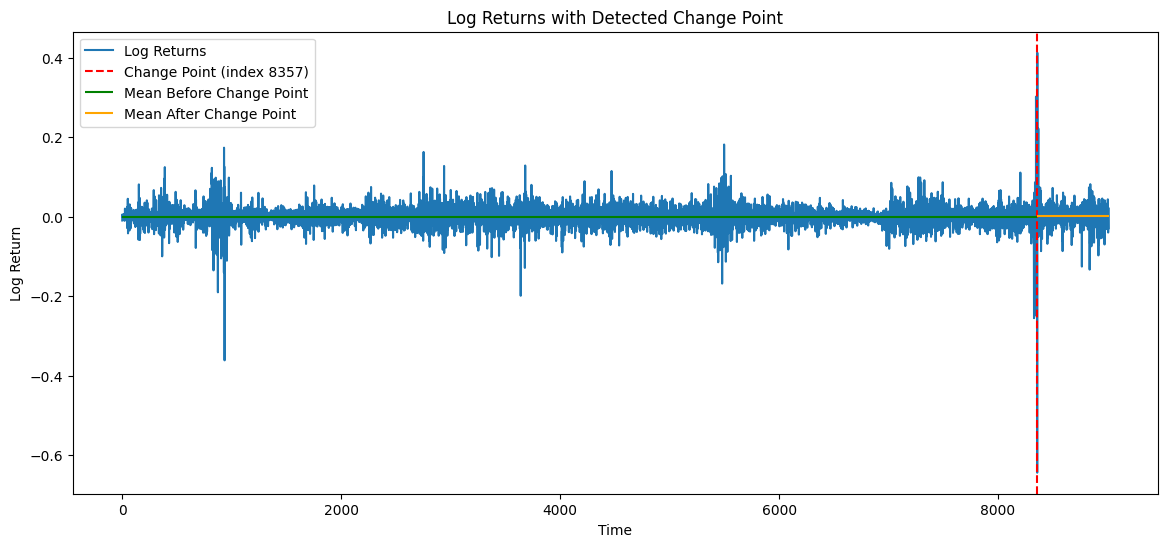

In [7]:
import matplotlib.pyplot as plt

# Plot log returns with change point
plt.figure(figsize=(14,6))
plt.plot(log_returns, label='Log Returns')

# Mark the change point
plt.axvline(x=tau, color='red', linestyle='--', label=f'Change Point (index {tau})')

# Plot mean before and after change point as horizontal lines
plt.hlines(mean_before, xmin=0, xmax=tau, colors='green', linestyles='-', label='Mean Before Change Point')
plt.hlines(mean_after, xmin=tau, xmax=len(log_returns), colors='orange', linestyles='-', label='Mean After Change Point')

plt.title('Log Returns with Detected Change Point')
plt.xlabel('Time')
plt.ylabel('Log Return')
plt.legend()
plt.show()